# CS110 Fall 2020 - Assignment 1
# Algorithm design & sorting - Problem set

## Part 1: Iteration vs. recursion 




In [1]:
def fibonacci_iterative(n):
    '''
    The code takes as an input the position (nth term) of the value the user wants to find and returns the value of 
    this input number accroding to Fibonacci Sequence: F(n) = F(n-1) + F(n-2).
    Each iteration calculates the next value by summing the previous two values and then updates the values 
    of first and second.

    Parameters
    ----------
    n : integer
        the position of desired number in Fibonacci sequence 
        
    Returns
    -------
    integer
        the sum of the two previous numbers of the nth number in the Fibonacci Sequence  
    '''
    first_num, second_num = 0, 1  # setting the values for F(0) and F(1)
    for i in range(0, n):  # setting the range till the position of input number 
        # the first number swaps with the second; the second one gets set to the sum of the previous two
        first_num, second_num = second_num, first_num + second_num 
    return first_num  # return the value of the input position  

def fibonacci_recursive(n):
    '''
    This code similarly to iterative approach takes as an input the position (nth term) of the value the user wants 
    to find and returns the value of this input number accroding to Fibonacci Sequence: F(n) = F(n-1) + F(n-2).
    The function computes the Fibonacci value by calling itself with a lesser value until the termination condition 
    is reached (term == 0 and term == 1).
    
    Parameters
    ----------
    n : integer
        the position of desired number in Fibonacci sequence 
        
    Returns
    -------
    integer
        the sum of the two previous numbers of the nth number in the Fibonacci Sequence 
    '''
    if n > 1:  # setting condition to enter if-statement to call on the function itself to find larger values of n
        return fibonacci_recursive(n-1) + fibonacci_recursive(n-2)
    return n  # if the input value is n>1, the fucntion returns value of given n

In [2]:
assert fibonacci_iterative(0) == 0
assert fibonacci_recursive(0) == 0
assert fibonacci_iterative(4) == 3
assert fibonacci_recursive(4) == 3

The iterative approach uses a for-loop to compute the Fibonacci sequence by summing the two numbers assigned in temporary values and updating thier values. This solution is very efficient as the time complexity is linear, $O(n)$, because of $T(n) = n$ (loop), and requires very little space ($O(1)$-constant) because as N changes, space/memory used remains the same, i.e. the amount of space needed for $fib(0)$ and $fib(100)$ is same.

The recursive approach when $n>1$ calls on itself several times to compute the sum of first and second number until it is downsized to the base case (n is less than or equal to 1). The time complexity in this case is exponential, $O(2^n)$, as for $n > 1$ the function calls itself twice: $T(n) = T(n-1) + T(n-2) + c$. For upper bound, we can assume that $T(n-2) ~ T(n-1)$ and after calculation we would get $T(n) = 2^n * (1 + c) - c$. Thus, $O(2^n)$. The space required in this approach is proportional to the maximum depth of the recursion tree because to compute each nth term it has to compute each previous term.

## Part 2: Understanding and documenting code
Imagine that you land your dream software engineering job, and among the first things you encounter is a previously written, poorly documented, and commented code.

Asking others how it works proved fruitless, as the original developer left. You are left with no choice but to understand the code’s inner mechanisms, and document it properly for both yourself and others. The previous developer also left behind several tests that show the code working correctly, but you have a hunch that there might be some problems there, too. Your tasks are listed below. Here is the code:

In [3]:
def my_sort(array):
    """
    YOUR DOCSTRING HERE
    """
    
    # ...
    for i in range(len(array)):
        
        # ...
        item = array[i]
        
        # ...
        intended_position = 0
        for num in array:
            if num < item:
                intended_position += 1
                
        # ...
        if i == intended_position:
            continue
        
        # ...
        array[intended_position], item = item, array[intended_position]
        
        # ...
        while i != intended_position:
            
            # ...
            intended_position = 0
            for num in array:
                if num < item:
                    intended_position += 1
            
            # ...
            array[intended_position], item = item, array[intended_position]
            
    return array
            


assert my_sort([8, 5, 7]) == [5, 7, 8]
assert my_sort([10, 9, 8, 7, 6, 5, 4, 3, 2, 1]) == [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
input_array = [43, 99, 85, 45, 21, 58, 24, 12, 14, 64, 19, 94, 56, 13, 51, 2, 37, 11, 8, 66, 3, 95, 93, 53, 35, 81, 97, 9, 47, 78, 27, 50, 82, 71, 62, 59, 57, 42, 69, 72, 30, 63, 18, 31, 32, 88, 92, 73, 10, 74, 41, 22, 1, 80, 5, 60, 76, 52, 49, 77, 54, 44, 15, 7, 28, 84, 33, 83, 16, 91, 67, 23, 87, 25, 79, 89, 34, 4, 38, 48, 6, 96, 39, 40, 68, 55, 20, 36, 29, 65, 86, 70, 26, 98, 46, 90, 17, 0, 61, 75]
assert my_sort(input_array) == sorted(input_array)

### Understanding code

The code takes in the input array and return a sorrted array. The function is comparing one a time every element of the list to other elements and counts elements smaller than the element of comparision. Then, it checks if the element of comparision has same position in the list as the count of elements less than it. If it does, than the function proceeds and does same operations on the next element. However, it the elements is not at the right position, then the algorithm swaps this current elements with the value of the element at the position where current element should be. Then, the function checks if the new (swapped) element at the right position. While it is not at the right position, the function repeats previous steps to swap this elements to its right position. The function continues to perform those operation on every element until the input list is fully sorted (every element is at the positio, which equals to the count of elements smaller than the element of comparision). 

###  Documenting code
Docstring is used to give a general overview of what to expect from the given piece of the code. It starts and ends with ''' and can be divided into multiple sections to explain what parameters are in the code, what it does, what are the inputs/output/expected results, etc. This kind of comments is written mostly for people who are going to be using the given code without needing or wanting to know how it works (its logic). For example, in this class, we receive our pre-class work with pieces of code, which include docstring to set expectations of what the code should do without telling how it will work (so, we know the expectations and based on that write the logic of the code). At the workplace, this is very useful as, most of the time, you would need to use various pieces of code written by other developers inside your code. However, you won't need to know how it works line-by-line, but instead what it does in general and how to use it correctly in your code. So, docstring can be treated as a smaller version of documentation (guide).

Meanwhile, the in-line comments are used to explain what the code does inside (the logic, can go as far as explaining every line). The in-line comments, in general, are right after the line of code it is supposed to present, followed by #. This is in general used to explain what is going on to people who want to extend the code/rewrite the code. For example, after a few years of code being written, you need to update it based on a new release of Python. For that, you would need to understand what the code does the logic behind every line to be able to update it to work correctly with the new version of Python. In this class, the students use in-line code to explain what exactly their code does to the reviewers to show the understanding of the code's logic. Thus, the in-line code is used to describe the code itself rather than usage. However, it doesn't mean that every line of the code should have an in-line comment. Those comments should be informative for non-obvious parts of the code and for essential (even if obvious) parts of the code. 

In [4]:
def my_sort(array):
    """
    This is a sorting algorithm which takes a list of numbers as an input and returns the same list sorted. 
    The code iteratively goes over each element in the list, compares one element at a time to every other element 
    and counts how many elements are less than the element of comparison. Then, it assigns this element of 
    comparison to a position, which equals the count of smaller elements in the list. The code loops over 
    until the position of each element matches the count of smaller elements. 
    
    Parameters
    ----------
    array : list
        A NON-EMPTY list of numbers 
        
    Returns
    -------
    list
        a sorted list of numbers 
        
    Example
    -------
    Using the array  [8, 5, 7], the result 
    of my_sort(array) is [5, 7, 8]: 
    
        8 - there are 2 elements smaller in value => position = 2
        5 - there are no elements smaller in value => position = 0
        7 - there is one element smaller in value => position = 1
        => [5, 7, 8] 
    """
    
    # iterates through every element in the list to check if it is at a righ position
    for i in range(len(array)):
        
        # sets a temporary value to hold element of the list for further comparisions and swappings 
        item = array[i]
        # sets the initial position of every element to 0
        intended_position = 0
        for num in array:
            if num < item:
                intended_position += 1
                
        # if the element is at the right position, then the loop proceeds to the next element
        if i == intended_position:
            continue
        
        # otherwise, it swaps the current element with the element at the intended position 
        array[intended_position], item = item, array[intended_position]
     
        # while the swapped element is not at a right position, the code repeats previous steps 
        while i != intended_position:
            
            # resets the initial position of the swapped element to 0
            intended_position = 0
            for num in array:
                if num < item:
                    intended_position += 1
    
            
            # swaps the current swapped element with the element at the intended position 
            array[intended_position], item = item, array[intended_position]
            
    return array



### Testing code

Those tests are insufficient because even if they check most common cases, they don't account for less obvious cases (extreme) where errors can occur. For example, there is no case which would test an input which is already sorted, when there is just one element in the list, when the smallest element is at the end/begining of list, when there are dublicates, etc. There is a case when the code doesn't pass: when two highest values are following each other in order (like, 1 and 2 or 99 and 100). Also, when there are dublicates, the function gets into infinite loop in the while loop.

In [5]:
#run the first assestion case to check that when there are dublicates, the code gets into infinite loop 
#assert my_sort([12,12,15,4,22]) == [4,12,12,15,22] 
assert my_sort([12,15,4]) == [4,12,15] 

IndexError: list index out of range

Here is the solution, which fixes the code to pass my suggested test case with two highest values following each other in order (like, 1 and 2 or 99 and 100). The initial code didn't swap the value of the current elemnt and element at the postion where the current should be; instead, it just changed the value of element at intended_position to the value of the current element. Now, it will be swaping them, so the code doesn't get out of range. For fixing the dublicate issue, we need to exit the loop. For that reason, I added a condition after which the while-loop breaks (might be not the best solution, but it works!).

In [6]:
def my_sort(array):
    
    # iterates through every element in the list to check if it is at a righ position
    for i in range(len(array)):
        
        # sets a temporary value to hold element of the list for further comparisions and swappings 
        item = array[i]
        # sets the initial position of every element to 0
        intended_position = 0
        for num in array:
            if num < item:
                intended_position += 1
                
        # if the element is at the right position, then the loop proceeds to the next element
        if i == intended_position:
            continue
        
        # otherwise, it changes the value of the element at the intended position to the current elements value
        array[intended_position], item = item, array[intended_position]
        array[i]=item  # added, now the function actually swaps the item and element at the intended_position
     
        # while the swapped element is not at a right position, the code repeats previous steps 
        while i != intended_position:
            
            # resets the initial position of the swapped element to 0
            intended_position = 0
            for num in array:
                if num < item:
                    intended_position += 1
    
            if array[intended_position]==item: # added, if items are same, break the loop
                break
            # changes the value of the element at the intended position to the current elements value 
            array[intended_position], item = item, array[intended_position]
            array[i]=item  # added, now the function actually swaps the item and element at the intended_position 
            
    return array

In [7]:
assert my_sort([12,12,15,4,22]) == [4,12,12,15,22]
assert my_sort([12,15,4]) == [4,12,15]

## Part 3: New and mixed sorting approaches 

In [8]:
def merge_3_sort(array, p, q):
    """
    Sorts array[p] to array[q] in place.


    Parameters
    ----------
    array : Python list or numpy array
    p : int
        index of array element to start sorting from
    q : int
        index of last array element to be sorted

    Returns
    -------
    array: a sorted Python list

    """
    # check if more than one elements remain between array[p] and array[q]
    if q - p > 1:
        # calculate where one-third and two-thirds of the input array are
        one_third = p + (q - p) // 3
        two_thirds = p + ((q - p) * 2) // 3
        # recursively call merge_3_sort() on each of the three sublists
        merge_3_sort(array, p, one_third) 
        merge_3_sort(array, one_third, two_thirds)
        merge_3_sort(array, two_thirds, q)
        # call merge_3() on the three sorted sublists to combine them
        merge_3(array, p, one_third, two_thirds, q) 
    # otherwise return the single element remaining
    else:
        if array[q] < array[p]:
            temp = array[q]
            array[q] = array[p]
            array[p] = temp
    return array  # return the sorted array


def merge_3(array, p, q, r, s):
    """
    Merges 3 sorted sublists (array[p] to array[q], array[q+1] to array[r] and array[r+1] to array[s]) in place.

    Parameters
    ----------
    array : Python list or numpy array
    p : int
        index of first element of first sublist
    q : int
        index of last element of first sublist
    r : int
        index of last element of second sublist
    s : int
        index of last element of third sublist

    """
    
    
    # copy each sublist to a placeholder
    sublist1 = array[p:q]
    sublist2 = array[q:r]
    sublist3 = array[r:s]

    # append infinity to the end of each placeholder list
    sublist1.append(float('inf'))
    sublist2.append(float('inf'))
    sublist3.append(float('inf'))
    
    # set length of each sublist
    len1 = len(sublist1)
    len2 = len(sublist2)
    len3 = len(sublist3)

    # set initial values of indices for the three sublists 
    j = 0
    k = 0
    z = 0
    
    # fill each position in array[p] to array[q]
    for i in range(p, s):
        
        # compare current elements of the three sublists and gets the smallest one out of them
            # feed the original array with the smallest value found out of comparision 
        if (sublist1[j] <= sublist2[k] or k >= len2) and j < len1:
            if sublist1[j] <= sublist3[z] or z >= len3:
                array[i] = sublist1[j] # feed the array with smallest value from sublist 1
                j += 1 # move to the next element of sublist 1 
            else:
                array[i] = sublist3[z] # feed the array with smallest value from sublist 3
                z += 1 # move to the next element of sublist 3
        else:
            if (sublist2[k] <= sublist3[z] or z >= len3) and k < len2:
                array[i] = sublist2[k] # feed the array with smallest value from sublist 2
                k += 1  # move to the next element of sublist 2
            else:
                array[i] = sublist3[z] # feed the array with smallest value from sublist 3
                z += 1  # move to the next element of sublist 3

### Testing your code

In [9]:
import random
input_array = [8, 5, 4, 6, 7, 2, 9, 1, 3]
assert merge_3_sort(input_array, 0, len(input_array) - 1) == sorted(input_array)
input_array = [1, 2, 3, 4, 5, 6, 7, 8, 9]
assert merge_3_sort(input_array, 0, len(input_array) - 1) == sorted(input_array)
input_array = [10,9,8,7,6,5,4,3,2,1]
assert merge_3_sort(input_array, 0, len(input_array) - 1) == sorted(input_array)
input_array = [3,3,4,7,74,5,9,56,74,6,2]
assert merge_3_sort(input_array, 0, len(input_array) - 1) == sorted(input_array)
input_array = [3,4,5]
assert merge_3_sort(input_array, 0, len(input_array) - 1) == sorted(input_array)
input_array = [3,4]
assert merge_3_sort(input_array, 0, len(input_array) - 1) == sorted(input_array)
input_array = [35]
assert merge_3_sort(input_array, 0, len(input_array) - 1) == sorted(input_array)
input_array = random.sample(range(0, 10000), 1000)
assert merge_3_sort(input_array, 0, len(input_array) - 1) == sorted(input_array)

I used test cases to check common, threshold and extreme cases. The typical case would be to check if any randomly generated list would pass the test; the threshold is to check if the test passes when $q-p>1$ is not satisfied. For extreme cases, I ensured that code works appropriately with duplicates and with already sorted/inverse list.
Those cases are appropriate for this code as they check that the code functions properly in all claims based on it is logic. This also means that those tests are most likely to be sufficient to ensure that code works as intended. 

### Mixing algorithms

In [10]:
def merge_3_sort_threshold(array, p, q):
    """
    Sorts array[p] to array[q] in place.


    Parameters
    ----------
    array : Python list or numpy array
    p : int
        index of array element to start sorting from
    q : int
        index of last array element to be sorted

    Returns
    -------
    array: a sorted Python list

    """
    # check if more than 20 elements (threshold) remain between array[p] and array[q]
    if q - p > 20:
        # calculate where one-third and two-thirds of the input array are
        one_third = p + (q - p) // 3
        two_thirds = p + ((q - p) * 2) // 3
        # recursively call merge_3_sort() on each of the three sublists
        merge_3_sort_threshold(array, p, one_third) 
        merge_3_sort_threshold(array, one_third, two_thirds)
        merge_3_sort_threshold(array, two_thirds, q)
        # call merge_3() on the three sorted sublists to combine them
        merge_3(array, p, one_third, two_thirds, q)
    # otherwise, use bubble sort to sort the given list 
    else:
        array = bubble_sort(array)
    return array  # return the sorted array
    
def merge_3(array, p, q, r, s):
    """
    Merges 3 sorted sublists (array[p] to array[q], array[q+1] to array[r] and array[r+1] to array[s]) in place.

    Parameters
    ----------
    array : Python list or numpy array
    p : int
        index of first element of first sublist
    q : int
        index of last element of first sublist
    r : int
        index of last element of second sublist
    s : int
        index of last element of third sublist

    """
  
    # copy each sublist to a placeholder
    sublist1 = array[p:q]
    sublist2 = array[q:r]
    sublist3 = array[r:s]

    # append infinity to the end of each placeholder list
    sublist1.append(float('inf'))
    sublist2.append(float('inf'))
    sublist3.append(float('inf'))
    
    # set length of each sublist
    len1 = len(sublist1)
    len2 = len(sublist2)
    len3 = len(sublist3)

    # set initial values of indices for the three sublists 
    j = 0
    k = 0
    z = 0
    
    # fill each position in array[p] to array[q]
    for i in range(p, s):
        
        # compare current elements of the three sublists and gets the smallest one out of them
            # feed the original array with the smallest value found out of comparision 
        if (sublist1[j] <= sublist2[k] or k >= len2) and j < len1:
            if sublist1[j] <= sublist3[z] or z >= len3:
                array[i] = sublist1[j] # feed the array with smallest value from sublist 1
                j += 1 # move to the next element of sublist 1 
            else:
                array[i] = sublist3[z] # feed the array with smallest value from sublist 3
                z += 1 # move to the next element of sublist 3
        else:
            if (sublist2[k] <= sublist3[z] or z >= len3) and k < len2:
                array[i] = sublist2[k] # feed the array with smallest value from sublist 2
                k += 1  # move to the next element of sublist 2
            else:
                array[i] = sublist3[z] # feed the array with smallest value from sublist 3
                z += 1  # move to the next element of sublist 3
                
def bubble_sort(A):
    '''
    The function takes in an array and sorts it by comparing two instances of the list (from left to right) 
    and swaps them if the instance on the left is bigger than the instance on the right. 
    
    Parameters
    ----------
    A : Python list or numpy array

    Returns
    -------
    A: a sorted Python list
    '''
    for i in range(0, len(A)-1):
        for j in range(len(A)-1, i, -1):
            if A[j] < A[j-1]:
                A[j] = A[j] + A[j - 1]
                A[j - 1] = A[j] - A[j - 1]
                A[j] = A[j] - A[j - 1]
    return A

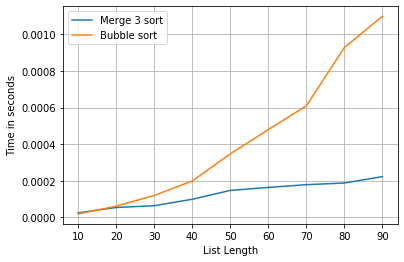

In [14]:
'''
    Graphical representation of time complexity comparision for 3-way merge sort and bubble sort 
'''
import time 
from numpy.random import randint 
import matplotlib.pyplot as plt 

# randomly generates list of different sizes and calls the selected sort funtion 
elements = [] 
times = []

def find_time(sort):
    
    for i in range(1, 10): 

        # generate some integers 
        a = randint(0, 10 * i, 10 * i) 
        a = a.tolist()  #converting np.array back to list 
        start = time.time() # start timer
        if sort == merge_3_sort: 
            sort(a, 0, len(a)-1)
        else:
            sort(a)
        end = time.time() # end timer
        
        # calculate time as elements are sorted 
        elements.append(len(a)) 
        times.append(end-start) 

        
plt.xlabel('List Length') 
plt.ylabel('Time in seconds') 
find_time(merge_3_sort)
plt.plot(elements, times, label ='Merge 3 sort')
elements = [] 
times = []  # reseting time for each function 
find_time(bubble_sort)
plt.plot(elements, times, label ='Bubble sort')
elements = [] 
times = []  # reseting time for each function 
plt.grid() 
plt.legend() 
plt.show()

As we see from the graph, till 20 elements bubble sort (orange) is doing better or same as merge 3 sort (blue). As bubble sort requires speacial mememory (it doesn't need to break down whole list until there is jsut one element left and do comprisions on every elements and merge them), we will take as a threshold 20 even if from graph it can be say that from 15 till 20 both sorts require same time. 

In [ ]:
import random
input_array = [8, 5, 4, 6, 7, 2, 9, 1, 3]
assert merge_3_sort_threshold(input_array, 0, len(input_array) - 1) == sorted(input_array)
input_array = [1, 2, 3, 4, 5, 6, 7, 8, 9]
assert merge_3_sort_threshold(input_array, 0, len(input_array) - 1) == sorted(input_array)
input_array = [10,9,8,7,6,5,4,3,2,1]
assert merge_3_sort_threshold(input_array, 0, len(input_array) - 1) == sorted(input_array)
input_array = [3,3,4,7, 74,5,9,56,74,6,2]
assert merge_3_sort_threshold(input_array, 0, len(input_array) - 1) == sorted(input_array)
input_array = [3,4,5]
assert merge_3_sort_threshold(input_array, 0, len(input_array) - 1) == sorted(input_array)
input_array = [3,4]
assert merge_3_sort_threshold(input_array, 0, len(input_array) - 1) == sorted(input_array)
input_array = [35]
assert merge_3_sort_threshold(input_array, 0, len(input_array) - 1) == sorted(input_array)
input_array = random.sample(range(0, 10000), 1000)
assert merge_3_sort_threshold(input_array, 0, len(input_array) - 1) == sorted(input_array)

### Algorithmic comparison

While thinking about time complexity of 3-way merge sort, we assume we are sorting s total of n elements in the entire list. Looking at the code, we have two divide steps, which take constant time regardless of the subarray size. So, we have here constant time in big-O notation : $O(1)$. Then, we have a conquer part: recursively sorting 3 subarrays of approx. $n/3$ elements each which take $T(n/3)$ time each. Finally, we have a combine steps, which merges a total of n events and takes linear amount of time: $O(n)$. Thus, time complexity of 3-way merge is $O(nlog_3n)$. The extended calculations and tree digram below show how we get to this answer. We also see from the code that the space complexity of this merge sort is $O(3n)$ or just $O(n)$ as it creates three temporary placeholders for subarrays and feeds in the sorted elements back to the actual array.

The 3-way merge sort with threshold includes also a bubble sort. As we saw from graphical comparision of time complexity of 3-way merge sort and bubble sort, bubble sort is more efficient for small number of elements in the array ($n<20$). The time complexity of bubble sort is $O(n^2)$. Space complexity in bubble sort is $O(1)$ as it it requires just one additional place for the temporary value. Now, to find time complexity of this enhanced merge sort, we need to combine the complexity of 3-way merge sort and bubble sort. As we saw from analysis of 3-way merge sort, its time complexity will be $𝑂(𝑛log(n/x))$ where $log(n/x)$ is the number of sublists. Here, we are sorting $n/x$ lists each of 𝑥 elements using bubble sort. So, time complexity of bubble sort would be either in best case $(n/x) * x$  or in worst $(n/x) * x^2$, where $x^2$ and $x$ are regular worst/best time complexities of bubble sort ($O(n^2)$ or $O(n)$). Thus, the total time complexity of 3-way merge sort with threshold would be in best case $O(𝑛+𝑛log_3(n/3))$ and in worst case $O(3n+𝑛log_3(n/3))$. This time complexity simplifies to $O(𝑛log_3(n/3))$ which is $<$ time complexity of regular 3-way merge, $O(nlog_3n)$.

From the graphical representation of the time complexity comparision of two sorting algorithms, we also see that 3-way merge sort with threshold outperforms regular 3-way merge. Also, as the enhanced 3-way merge doesn't require bigger space complexity (as bubble sort has O(1) space coomplexity), this approach seems even more efficient to use as with smaller lists (less than 20 elements), the space complexity will also outperform the rugular 3-way merge.